<a href="https://colab.research.google.com/github/sonjoy2074/machine_learning_for_everyone/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [42]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [43]:
df['class']=(df['class']=='g').astype(int)

In [44]:
df['class'].unique()

array([1, 0])

In [45]:
df.isnull().sum()

,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0
fDist,0


In [15]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


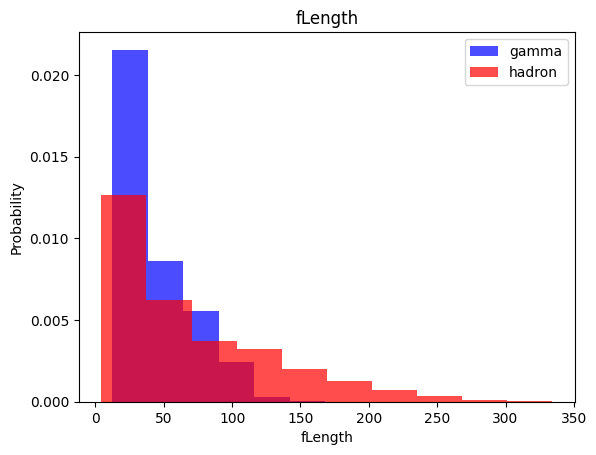

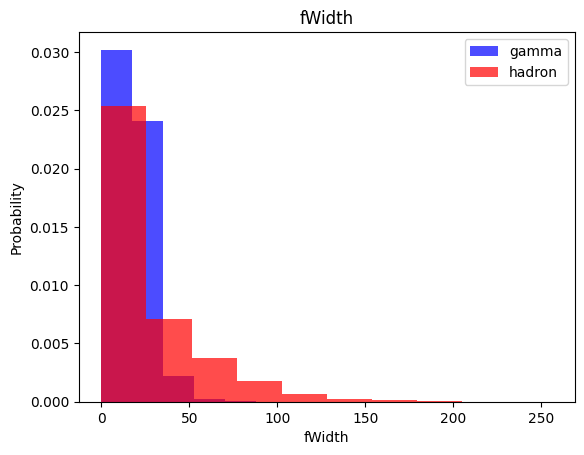

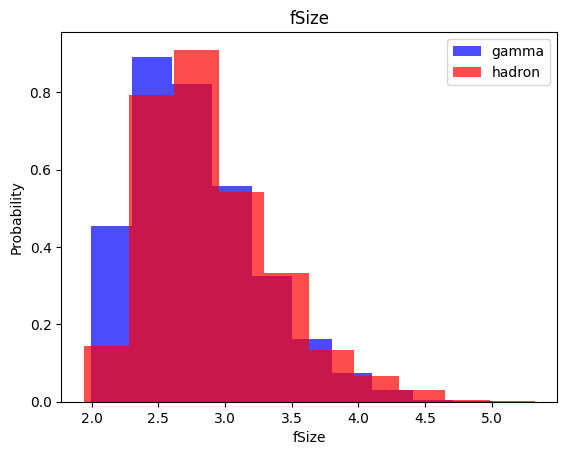

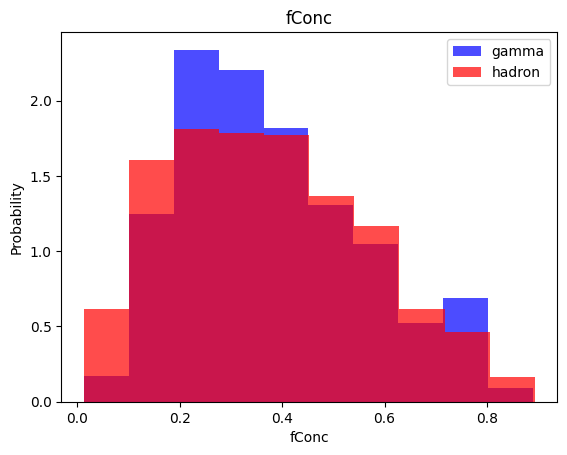

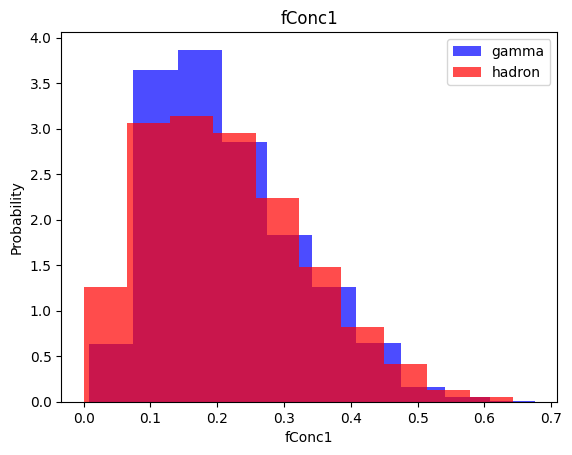

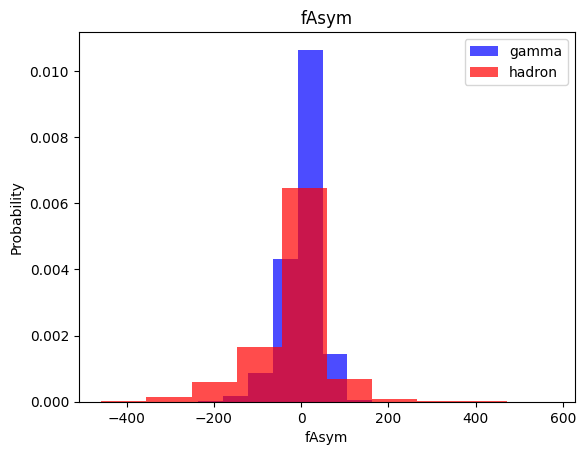

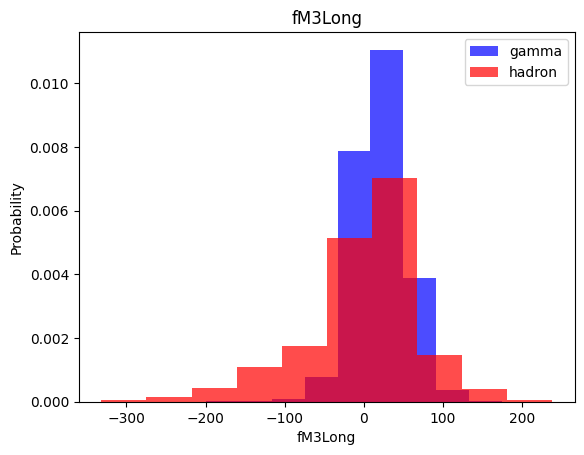

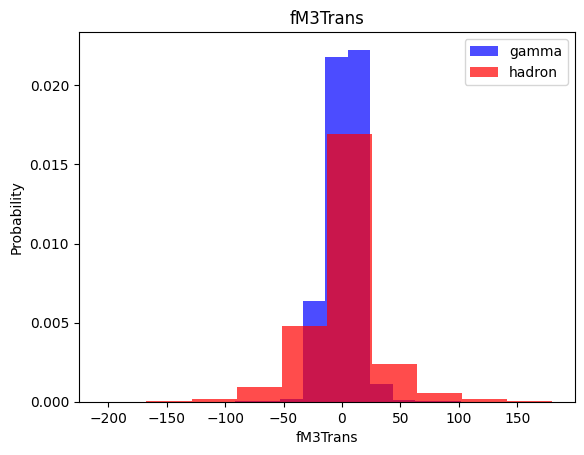

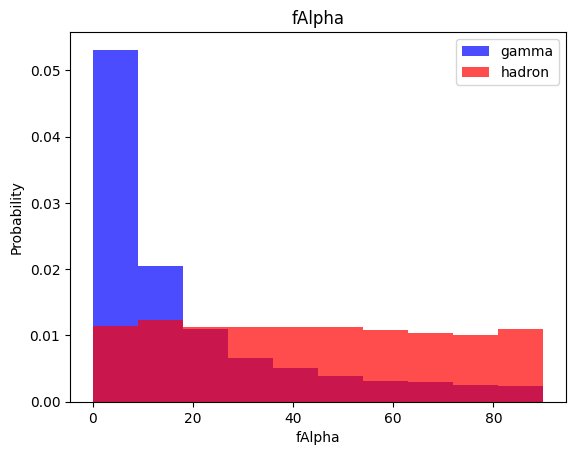

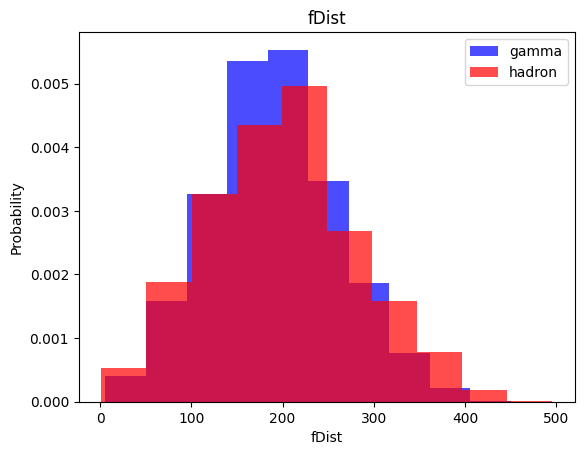

In [46]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, valid, test dataset

In [77]:
train, valid, test= np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [78]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [79]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)
test, x_test, y_test= scale_dataset(test, oversample=False)

***KNN***

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [81]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [82]:
y_pred=knn_model.predict(x_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1342
           1       0.85      0.86      0.85      2462

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [86]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1342
           1       0.74      0.89      0.81      2462

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



**Log Regression**

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [89]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [90]:
from sklearn.svm import SVC

In [91]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [92]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1342
           1       0.89      0.90      0.90      2462

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



**Nural Network**

In [94]:
import tensorflow as tf

In [98]:
# Neural network
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [99]:
history=nn_model.fit(
    x_train,y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100
)

Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7514 - loss: 0.5187 - val_accuracy: 0.6662 - val_loss: 0.5806
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3711 - val_accuracy: 0.6642 - val_loss: 0.6493
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3510 - val_accuracy: 0.7419 - val_loss: 0.5075
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3458 - val_accuracy: 0.7197 - val_loss: 0.5546
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3318 - val_accuracy: 0.7426 - val_loss: 0.5121
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8598 - loss: 0.3343 - val_accuracy: 0.7332 - val_loss: 0.5069
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3324 - val_accuracy: 0.7480 - val_loss: 0.4856
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8599 - loss: 0.3276 - val_accu

In [100]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

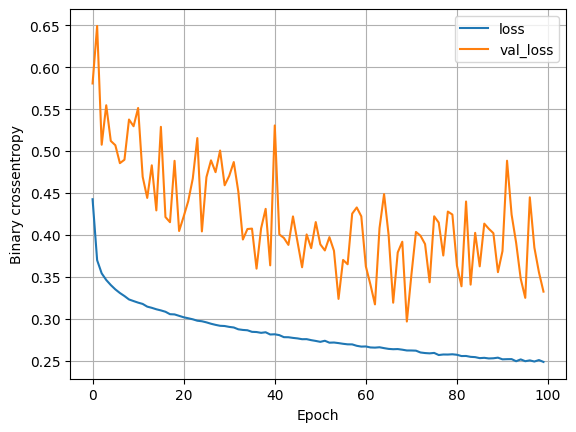

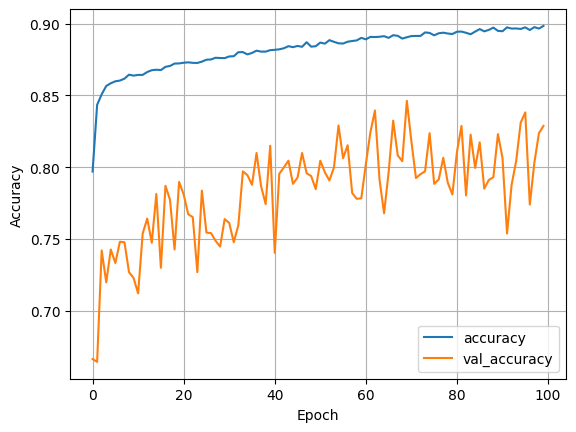

In [101]:
plot_loss(history)
plot_accuracy(history)